In [13]:
import pandas as pd
import csv
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv("USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
"""
1. The built-in dataset USArrests contains statistics about violent crime rates in the US States. 
Determine which states are outliers in terms of murders. 
Outliers, for the sake of this question, are defined as values that are more than 1.5 standard deviations from the mean.
"""

df['z_murder'] = np.abs(stats.zscore(df['Murder']))
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,z_murder
0,Alabama,13.2,236,58,21.2,1.255179
1,Alaska,10.0,263,48,44.5,0.513019
2,Arizona,8.1,294,80,31.0,0.072361
3,Arkansas,8.8,190,50,19.5,0.234708
4,California,9.0,276,91,40.6,0.281093


In [10]:
df.loc[df['z_murder'] >= 1.5]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,z_murder
8,Florida,15.4,335,80,31.9,1.765415
9,Georgia,17.4,211,60,25.8,2.229265
17,Louisiana,15.4,249,66,22.2,1.765415
23,Mississippi,16.1,259,44,17.1,1.927762
33,North Dakota,0.8,45,44,7.3,1.620693
39,South Carolina,14.4,279,48,22.5,1.533490


In [12]:
"""
2.  For the same dataset as in (1), is there a correlation between urban population and murder, i.e.,
as one goes up, does the other statistic as well? Comment on the strength of the correlation. 
Calculate the Pearson coefficient of correlation.
"""

df['UrbanPop'].corr(df['Murder'],method='pearson')

0.06957262173599343

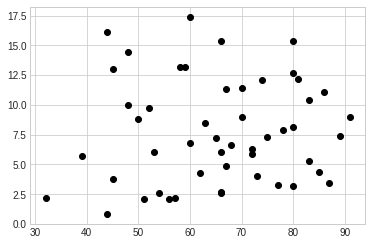

In [15]:
plt.plot(df['UrbanPop'], df['Murder'],'o', color='black')

In [16]:
data = pd.read_csv("Raw Data Mobile Phone Growth (Brazil) - Mobile Phone Subscriptions.csv")
data.head()

,Year,Subscribers
0,1,23188171
1,2,28745769
2,3,34880964
3,4,46373266
4,5,65605000


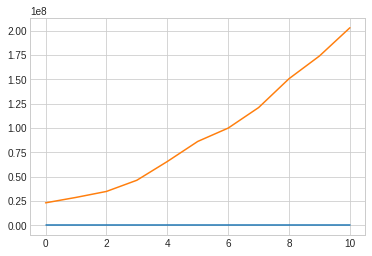

In [17]:
plt.plot(data)

In [23]:
data['Moving_Avg'] = data['Subscribers'].rolling(3).mean()
data.head()


,Year,Subscribers,Moving_Avg,wma
0,1,23188171,NaN,NaN
1,2,28745769,NaN,2.477606e+07
2,3,34880964,2.893830e+07,3.049868e+07
3,4,46373266,3.666667e+07,3.816448e+07
4,5,65605000,4.895308e+07,5.186805e+07


In [25]:
weights = np.array([5,2])
data['wma'] = data['Subscribers'].rolling(len(weights)).apply(lambda column: np.correlate(column,weights/sum(weights)),raw=False)
data.head()

,Year,Subscribers,Moving_Avg,wma
0,1,23188171,NaN,NaN
1,2,28745769,NaN,2.477606e+07
2,3,34880964,2.893830e+07,3.049868e+07
3,4,46373266,3.666667e+07,3.816448e+07
4,5,65605000,4.895308e+07,5.186805e+07
